# Analysis of Regression Models for Alcohol Content Prediction of White Wine 🥂
**Student Name**: Kanhchana Ly

**Student ID**: 501258946

In this project, I will be using the white wine dataset from https://archive.ics.uci.edu/dataset/186/wine+quality to train and evaluate regression models for the purpose of predicting the alcohol content of white wines. This project is sectioned into six main steps:
1. Exploratory Data Analysis (EDA)
2. Feature Engineering and Model Selection
3. Tuning and Bagging of Final Model
4. Analysis and Discussion of Performance of Final Method
5. Deployment of Final Model to HuggingFace
6. Conclusion and Future Improvements

Before starting the project, we need to ensure PyCaret is installed and the Python used in the current environment is compatible with PyCaret (Python 3.7 – 3.10).

In [ ]:
!pip install pycaret

In [159]:
# Check pycaret version
import pycaret
pycaret.__version__

'3.3.2'

In [160]:
# Check the Python version being used and ensures it is within version 3.7-3.10 otherwise there will be errors down the line
import sys
print("Python version:", sys.version)

Python version: 3.10.15 | packaged by conda-forge | (main, Oct 16 2024, 01:24:20) [Clang 17.0.6 ]


To begin the project, I will first import the dataset into my project from the .csv file in my Github repository and set 'alcohol' as the target variable (y) while the rest as features (X).

In [161]:
import pandas as pd

url = "https://raw.githubusercontent.com/kanhchanaly/EE8230_Final_Project_Kanhchana_Ly/refs/heads/main/winequality-white.csv"
dataset = pd.read_csv(url,sep=";")
X = dataset.drop('alcohol', axis=1)
y = dataset['alcohol']

# 1. Exploratory Data Analysis

The performance of a trained machine model is highly dependent on the quality of the training dataset. Therefore, before training a model, we should first check and analyze the data to identify main characteristics, distributions, patterns, missing entries, correlations or anomalies. This process is known as exploratory data analysis (EDA).

**1.1 General Overview of Dataset**

To get a general overview of the dataset, the functions `info()` is used. 

In [162]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


From `info()` we are able to see that there are 4898 samples in total, with each samples containing 11 columns. All columns have datatypes of a float, with the exception of 'quality'. To ensure that there are no missing values from the dataset, the function `isnull().sum()` is used.

In [163]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From the output, we are able to see there is no null values in the dataset, indicating that the dataset is complete. To further understand the distribution of each of the values in each columns, the function `describe()` is used as follows:

In [164]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


There are a few points that can be observed from the output given by `describe()`:
- The values of each columns are not in the same magnitude. For example, the mean of **total sulfur dioxide** (138.360657 )is 3022 times larger than **chlorides** (0.045772). This indicates that we need to do some feature scaling to ensure the model does not get dominated by large-scale features.
- By roughly scanning through the min, 25%, 50%, 75%, and max, it can be observed that there is some skewing in the data distribution. For example, in columns such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, and free sulfur dioxiode, the 75% value is much smaller than the maximum value. This implies the data is skewed and could indicate outliers that may influence the model performance.

**1.2 Visualization of Data Distribution and Outliers**

To better see whether observations from Section 1.1 are true, a visualization of the feature distribution can be done through a histogram plot.

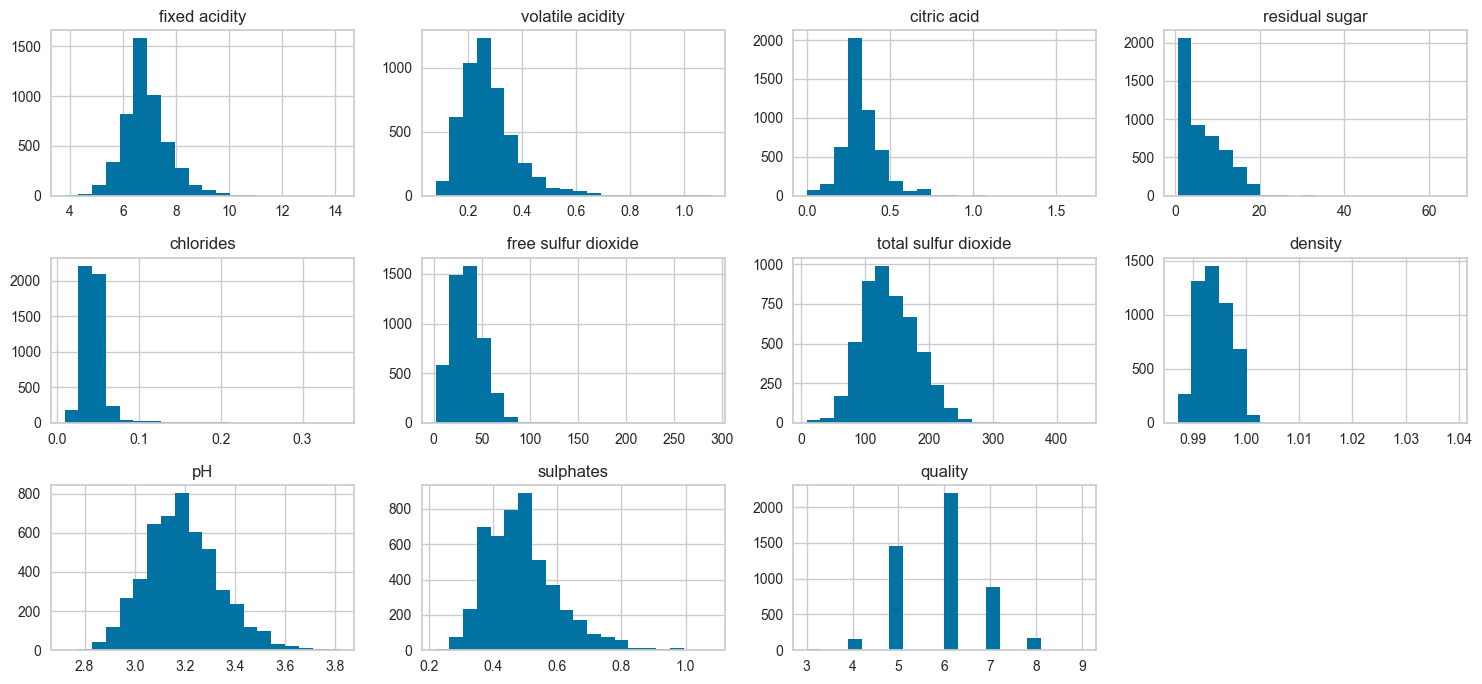

In [165]:
import matplotlib.pyplot as plt

# Plot histogram plots of each feature
X.hist(figsize=(15, 7), bins=20, layout=(3, 4))
plt.tight_layout()

From the plotted histograms, it can be seen that:
- There are some highly right-skewed features such as 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', and 'density'. Some of the other features such as 'total sulfur dioxide', 'sulphates' are also right skewed although at a moderate degree.
- 'pH' is the only feature that exhibits a relatively normal distribution.
- 'quality' feature is in integers and discrete values that are not continuous and divided into ranked categories (e.g. 1,2,3,...)
  
From the histogram plots, we see that a majority of the features have skewed data, which would be harmful for models such as Gaussian Naive Bayes which assumes a normally distributed data. In this case, transformation of the data would be needed to correct the skewness. However, since this project will be focusing on regression models, Gaussian Naive Bayes will not be studied and there will be no need to transform the skewed data. 

Although histogram effectively shows data distribution and skewness, they did not show the outliers well. To better identify the features containing outliers, we will plot a boxplot for each features.

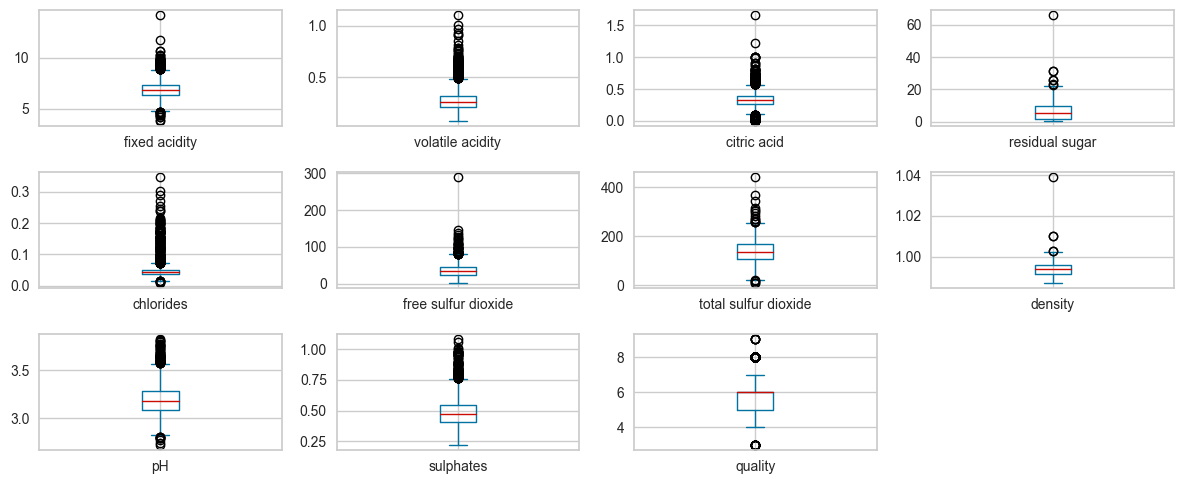

In [166]:
# Make a boxplot of each features
X.plot(kind='box', subplots=True, layout=(3,4), figsize=(12,5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

The boxplot of each features are shown above. It can be seen that there are certain features with extreme outliers such as residual sugar, free sulfur dioxide, and density. This indicates that choosing a scaling method that is not sensitive to ouliers could be a good choice.

**1.3 Pairwise Correlation Analysis**

To understand the pairwise correlation between each features, we will do a correlation analysis using `corr()` function. This step is particularly important since we are able to see which features are highly correlated to our target, which in this case is **alcohol**. We will also see which features have little correlation to our target, which could give us an idea on which features are relevant or irrelevant.

<Axes: title={'center': 'Pairwise Correlation Matrix'}>

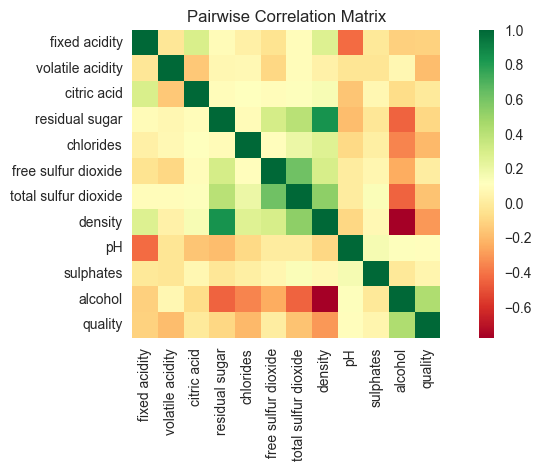

In [167]:
import seaborn as sns

# Plot pairwise correlation matrix of the features and target
plt.figure(figsize=(10, 4))
plt.title('Pairwise Correlation Matrix')
sns.heatmap(dataset.corr(), square=True, cmap='RdYlGn')

Above, we see a heatmap displaying the pairwise correlation between each feature-feature, and feature-target. The green color indicates a positive correlation whereas red shows negative correlation. The darker the color is, the more intense the correlation is. From the heatmap, it shows our target **alcohol** is highly negatively correlated with density. Although not as intense, **alcohol** also has a negative correleation with total sulfur dioxide, free sulfur dioxide, chlorides, and residual sugar. On the contrary, **alcohol** seems to have a positive correlation with only quality. Other features such as pH, sulphates, citric acid, volatile acidity, and fixed acidity has little to no correlation with our target.

This correlation analysis provides an overall idea on which features are important to predicting our target. If some features have no impact on the prediction of our alcohol content, it should be dropped to reduce the load on the model and improve its accuracy.

**1.4 Creation of Validation Data Set for Evaluation of Finalized Model**

As a way to provide an unbiased assessment of the final trained model, a validation dataset (or unseen dataset) is created by setting aside a portion from the original dataset. This data set is never seen by the model and is not involved in the test/train sample. It is used in the very end, only after the model is fully trained and finalized. For this project, we will use 5% of the original dataset as the validation dataset.

In [168]:
# Randomly choose 95% of the original data set as the model data
model_data = dataset.sample(frac=0.95, random_state=123)

In [169]:
# Set the validation data as the remaining 5%
validation_data = dataset.drop(model_data.index)

In [170]:
# Final shape of original dataset, model dataset, and validation dataset
model_data.reset_index(inplace=True, drop=True)
validation_data.reset_index(inplace=True, drop=True)
print('Original Dataset: ' + str(dataset.shape))
print('Data for Modeling: ' + str(model_data.shape))
print('Unseen Data For Predictions: ' + str(validation_data.shape))

Original Dataset: (4898, 12)
Data for Modeling: (4653, 12)
Unseen Data For Predictions: (245, 12)


# 2. Feature Engineering and Model Selection

**2.1 Feature Scaling and Model Comparison**

From our EDA conducted in Section 1, it was observed that the there are some differences in the magnitudes of each features. Therefore, a scaling procedure will be needed. Since the data distribution of some features are skewed and there are some outliers, **robust scaling** could be a viable option since it is less affected by outliers compared to other scaling methods.

To see the effect of robust scaling, we will compare the performance of the unscaled data to the scaled data.

For this project, the main performance metrics that will be considered to compare and choose the best performing models are R2, RMSE, and MAE for the following reasons:
- **R2**: this metric measures how well the model captures the variance of the data, with the higher the metric is, the better the model is at capturing the data. It's one of the most important metric that showcases the overall model fit of the regression model so R2 should be one of the main metrics used for model comparison.
- **RMSE**: this metric has the same unit as the target value (alcohol) making it more intuitive for users to intepret and compare across models. Since RMSE penalizes large errors, it is useful to indentify when a model occasionally predicts wrongly with a significant error.
- **MAE**: this metric is also in the same scale as the target value making it easy to relate to the target value. However unlike RMSE, it treats all errors equally.

Depending on the purpose of the model, the importance of RMSE and MAE changes for example:
- **General labeling for consumers**: large label errors on the alcoholic content might not have a serious consequence for the customers when they drink it. In this case, RMSE might not have any more importance than MAE since large errors do not hold much significance.
- **Quality assessment for pricing**: Alcohol content is an important feature in determining the wine quality which directly relates to the selling price. In this case, a large error in alcohol content prediction could lead to mislabeling of quality and pricing. From the seller's standpoint, this would mean a revenue loss. Therefore, for this application RMSE would be more important.

For this project, we will assume general purpose, and will treat MAE and RMSE as the same priority.

In [171]:
from pycaret.regression import *

# Setup for unscaled data
# Pycaret automatically splits the test/train data set to 70/30
unscaled_data = setup(data=model_data, 
                      target='alcohol', 
                      session_id=123,
                      fold=10)

# Evaluate performance of different regression models trained on unscaled data
best_model_unscaled = compare_models()

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4653, 12)"
4,Transformed data shape,"(4653, 12)"
5,Transformed train set shape,"(3257, 12)"
6,Transformed test set shape,"(1396, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2498,0.1168,0.3408,0.9220,0.0294,0.0237,0.2510
et,Extra Trees Regressor,0.2404,0.1336,0.3649,0.9107,0.0314,0.0227,0.0840
rf,Random Forest Regressor,0.2561,0.1360,0.3675,0.9094,0.0316,0.0242,0.1730
gbr,Gradient Boosting Regressor,0.3059,0.1628,0.4029,0.8912,0.0350,0.0292,0.0740
lr,Linear Regression,0.3106,0.2475,0.4605,0.8417,0.0366,0.0299,0.2320
br,Bayesian Ridge,0.3108,0.2476,0.4607,0.8417,0.0367,0.0299,0.0040
dt,Decision Tree Regressor,0.3334,0.2696,0.5180,0.8196,0.0444,0.0314,0.0080
ada,AdaBoost Regressor,0.4712,0.3294,0.5738,0.7789,0.0505,0.0460,0.0390
ridge,Ridge Regression,0.7021,0.7688,0.8761,0.4857,0.0754,0.0667,0.0040
huber,Huber Regressor,0.7447,0.8776,0.9365,0.4121,0.0803,0.0703,0.0150


The `compare_model()` function shows the different metrics (MAE, MSE, RMSE, R2, RMSLE, MAPE, and TT) for a variety of regression models. If we were to focus on the three main metrics (R2, MAE, and RMSE) we see that the best performing model is **lightgbm** as it has the best RMSE and R2 metrics. Although **rf** has a better MAE score than **lightgbm**, this difference is very small compared to the RMSE difference that **lightgbm** has over the **rf** model.

In [172]:
# Scale data using the robust scaling method
robust_scaled_data = setup(data=model_data,
                           target='alcohol',
                           normalize=True,
                           normalize_method='robust',
                           verbose=False,
                           session_id=123,
                           fold=10)

# Show the overall statistics after robust scaling
get_config('X_transformed').describe()

# Evaluate performance of different regression models trained on scaled data
best_model_scaled = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2484,0.1151,0.3383,0.9232,0.0291,0.0236,0.2230
et,Extra Trees Regressor,0.2404,0.1336,0.3649,0.9107,0.0314,0.0227,0.0840
rf,Random Forest Regressor,0.2561,0.1361,0.3676,0.9093,0.0316,0.0242,0.1750
gbr,Gradient Boosting Regressor,0.3058,0.1627,0.4029,0.8912,0.0350,0.0292,0.0740
huber,Huber Regressor,0.2869,0.2476,0.4523,0.8425,0.0355,0.0275,0.0080
ridge,Ridge Regression,0.3116,0.2472,0.4609,0.8418,0.0368,0.0299,0.0060
lr,Linear Regression,0.3106,0.2475,0.4605,0.8417,0.0366,0.0299,0.0050
lar,Least Angle Regression,0.3106,0.2475,0.4605,0.8417,0.0366,0.0299,0.0050
br,Bayesian Ridge,0.3108,0.2476,0.4606,0.8417,0.0367,0.0299,0.0060
dt,Decision Tree Regressor,0.3335,0.2701,0.5186,0.8192,0.0445,0.0314,0.0090


After scaling the data, we see that **lightgbm** still remains as the best performing model. Comparing the performance metrics to the unscaled data, we see there is an improvement after scaling although the improvement is small. It is worth noting that scaling the data significantly improved the performance of models such as Huber Regressor and Ridge Regressor, indicating that these models are more effected by the scaling than the Light Gradient Boosting Machine model.

Although the scaling did not significantly improve our performance, it is evident that there is a slight improvement that is consistent across all metrics as seen in the reduction of MAE, MSE, RMSE, and RMSLE scores and an increase in R2. **Since there is a small improvement and no signs of downside to scaling, we will proceed to scale the data.**

Therefore, from this analysis, we will scale the data using the **robust scaling method** and also choose **lightgbm** as our training model.

One thing to note is that the three top best models are all tree-based methods. Tree-based methods work well with **non-linear data** which is the case for this dataset. This can be seen more clearly if we plot the relationship between each feature and the target alcohol as shown below: 

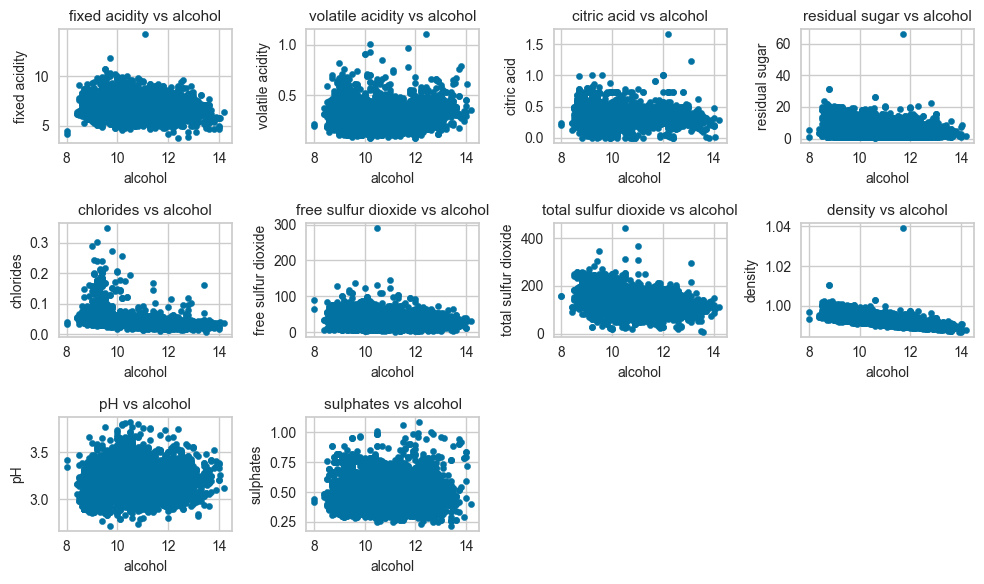

In [173]:
# Plot the relationship between features and alcohol to show non-linearity

cols = dataset.drop(columns=['alcohol','quality']).columns
n_cols = 4
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    ax.scatter(dataset['alcohol'], dataset[col], s=20)  # smaller marker size
    ax.set_xlabel('alcohol', fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    ax.set_title(f'{col} vs alcohol', fontsize=11)

for ax in axes[len(cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

From the plots, we see that the dataset truly is non-linear, which explains why tree-based methods perform very well. As an explanation to why **lightgbm** model performs better than **et** and **rf**, it could be because **lightgbm** uses boosting in which each trees are built sequentially and it focuses on reducing the error made by the previous tree. This could possibly ensure a more accurate result than the bagging ensembling method that **et** and **rf** use.

Furthermore, **lightgbm** also uses a 'leaf-wise' approach in which it prioritize splitting the best-performing leaf enabling it to create deeper and more complex trees. This could be the reason as to why it performs better than the **gbr (Gradient Boosting Regressor)** which uses a level-wise growth approach.

**2.2 Feature Importance Analysis for Feature Dropping**

When training a model on a dataset, it is important to drop certain features if they have no positive or negative impact on the model performance. Doing so could improve the model performance and reduce the time and memory needed to train the model.

The correlation matrix in Section 1 shows that there are some features that are highly correlated with our target 'alcohol' while some has no correlation. To fully quantitize and analyze the importance of each features in predicting our target we will use **lightgbm** to show the importance of each features to determine which features are suitable for dropping.

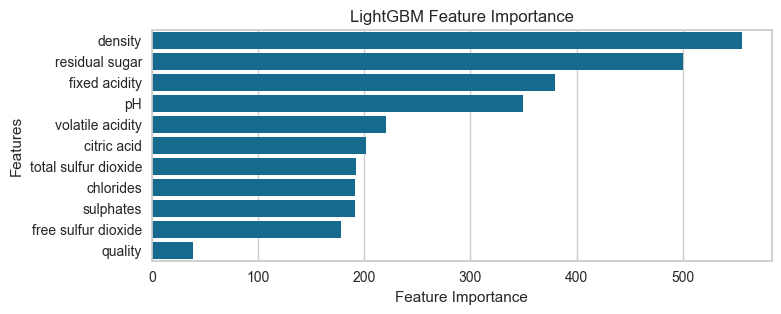

In [174]:
# Setup a new pycaret environemnt and normalize the data using robust method
setup_lightgbm = setup(data=model_data, 
                       target='alcohol', 
                       normalize=True, 
                       normalize_method='robust', 
                       session_id=123, 
                       verbose=False,
                       fold=10)

# Create lightgbm model
lightgbm_model = create_model('lightgbm', verbose=False)

# Extract the feature importance values from the lightgbm model
importances = lightgbm_model.feature_importances_

# Pair the feature importance values with their respective feature name and sort in descending order
feat_imp = sorted(zip(X, importances), key=lambda x: x[1], reverse=True)
features = [f[0] for f in feat_imp]
importance_values = [f[1] for f in feat_imp]

# Plot the feature importances
plt.figure(figsize=(8,3))
sns.barplot(x=importance_values, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('LightGBM Feature Importance')
plt.show()

We can see that in agreement to the correlation matrix plotted in Section 1, density has the highest influence to our target alcohol. In contrary, the 'quality' feature has the least importance relative to other features.

Now, we will investigate whether dropping the 'quality' feature would result in an improvement in the model performance.

In [175]:
# Performance of model before dropping 'quality' feature
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2697,0.1457,0.3817,0.9152,0.0327,0.0253
1,0.2373,0.0999,0.3161,0.9293,0.0275,0.0227
2,0.2593,0.1241,0.3523,0.9106,0.0299,0.0244
3,0.2430,0.1013,0.3183,0.9272,0.0280,0.0235
4,0.2440,0.1021,0.3195,0.9337,0.0272,0.0230
5,0.2492,0.1446,0.3803,0.9045,0.0324,0.0235
6,0.2541,0.1225,0.3500,0.9183,0.0303,0.0241
7,0.2372,0.0990,0.3146,0.9357,0.0270,0.0225
8,0.2402,0.0999,0.3161,0.9313,0.0279,0.0233


First, let's drop the quality feature from the feature matrix.

In [176]:
# Drop quality feature and evaluate model performance
setup_drop = setup(data=model_data, 
                   target='alcohol', 
                   normalize=True, 
                   normalize_method='robust', 
                   ignore_features='quality', 
                   session_id=123, 
                   verbose=False,
                   fold=10)
lightgbm_model_drop = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2764,0.1454,0.3813,0.9154,0.0327,0.0259
1,0.2349,0.0983,0.3135,0.9304,0.0273,0.0224
2,0.2604,0.1254,0.3542,0.9097,0.0301,0.0245
3,0.2443,0.1032,0.3212,0.9259,0.0282,0.0236
4,0.2418,0.0996,0.3156,0.9353,0.0269,0.0228
5,0.2521,0.1452,0.3810,0.9042,0.0325,0.0239
6,0.2577,0.1257,0.3545,0.9162,0.0307,0.0245
7,0.2409,0.1002,0.3165,0.9349,0.0272,0.0228
8,0.2344,0.1002,0.3165,0.9311,0.0281,0.0228


If we compare the performance metrics of **lightgbm** before we dropped the 'quality' feature to after dropping, we see:
- **MAE**: 0.2484 -> 0.2487
- **MSE**: 0.1151 -> 0.1153
- **RMSE**: 0.3383 -> 0.3385
- **R2**: 0.9232 -> 0.9231
- **RMSLE**: 0.0291 -> 0.0292
- **MAPE**: 0.0236 -> 0.0236

Overall, there is almost no change in performance metrics after dropping the 'quality' feature. Although we see some changes in some metrics, these changes are extremely small (less than 0.35%), which are not significant and could possibly be fluctuations due to noise. This indicates that dropping the 'quality' feature did not have a negative impact on the performance.

Therefore, we can safely drop the 'quality' feature. We now have our best final model to be a model that was trained using lightgbm on a dataset that has been robustly scaled and the 'quality' feature dropped.

In [177]:
# Rename our model to final_model

setup_drop = setup(data=model_data, 
                   target='alcohol', 
                   normalize=True, 
                   normalize_method='robust', 
                   ignore_features='quality', 
                   session_id=123, 
                   verbose=False,  
                   imputation_type=None,
                   fold=10)
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2764,0.1454,0.3813,0.9154,0.0327,0.0259
1,0.2349,0.0983,0.3135,0.9304,0.0273,0.0224
2,0.2604,0.1254,0.3542,0.9097,0.0301,0.0245
3,0.2443,0.1032,0.3212,0.9259,0.0282,0.0236
4,0.2418,0.0996,0.3156,0.9353,0.0269,0.0228
5,0.2521,0.1452,0.3810,0.9042,0.0325,0.0239
6,0.2577,0.1257,0.3545,0.9162,0.0307,0.0245
7,0.2409,0.1002,0.3165,0.9349,0.0272,0.0228
8,0.2344,0.1002,0.3165,0.9311,0.0281,0.0228


# 3. Tuning and Bagging of Final Model

**3.1 Tuning**

In PyCaret, we can use the ``tune_model()`` function to automatically tune the model by searching for the optimal hyperparameters that will result in the best performance. We will conduct a grid search with a few different combinations to investigate whether tuning will be beneficial to the model.

In [179]:
custom_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'random_state': [123]
}
tuned_lightgbm_model = tune_model(lightgbm_model, custom_grid = custom_grid)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2693,0.1412,0.3757,0.9179,0.0322,0.0252
1,0.2362,0.0989,0.3144,0.9300,0.0274,0.0225
2,0.2538,0.1212,0.3482,0.9127,0.0296,0.0238
3,0.2453,0.1082,0.3289,0.9223,0.0290,0.0237
4,0.2306,0.0944,0.3072,0.9387,0.0260,0.0217
5,0.2422,0.1420,0.3769,0.9063,0.0321,0.0229
6,0.2437,0.1119,0.3345,0.9254,0.0290,0.0232
7,0.2389,0.1010,0.3178,0.9344,0.0273,0.0226
8,0.2360,0.0990,0.3147,0.9319,0.0278,0.0228


Fitting 10 folds for each of 9 candidates, totalling 90 fits


We see that after tuning, there are improvements in the MAE, RMSE, and R2. Compared to the previous model `lightgbm_model`, the MAE decreased from 0.2487 to 0.2438. RMSE decreased from 0.3385 to 0.3346. R2 increased from 0.9231 to 0.9249.

**3.2 Bagging**

Bagging is an ensemble method in which multiple instances of the same learning algorithm are trained on different subsets of the training data and the predictions are then averaged. Due to the averaging of each predictions, bagging results in the reduction of variation, making the final prediction more stable.

To evaluate whether our chosen model can benefit from bagging and using the **lightgbm** as the base model, let's conduct a residual analysis to see the difference between the train and test residuals (R2).

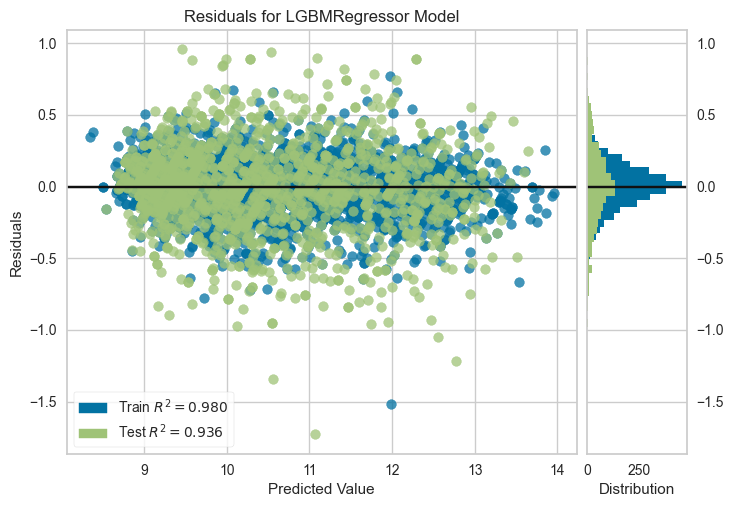

In [180]:
plot_model(tuned_lightgbm_model, plot='residuals')

The residuals plot shows that the training set has R2 of 0.980 and the test set as an R2 of 0.936. The training set has a better fitting than the test set with a difference of 0.044. Let's run a bagging ensemble method using the `ensemble_model()` function, with 25 n_estimators and a 10-fold cross-validation. This means that 25 lightgbm instances will be created, trained, and their predictions will be averaged.

In [181]:
bagged_tuned_lightgbm_model = ensemble_model(
    tuned_lightgbm_model,
    method='Bagging',
    n_estimators=25,      
    fold=10,
    verbose=True
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2574,0.1329,0.3645,0.9227,0.0313,0.0241
1,0.2291,0.0956,0.3091,0.9323,0.0269,0.0218
2,0.2457,0.1128,0.3359,0.9188,0.0287,0.0232
3,0.2399,0.1020,0.3193,0.9268,0.0281,0.0232
4,0.2355,0.0953,0.3087,0.9381,0.0263,0.0223
5,0.2487,0.1438,0.3792,0.9051,0.0323,0.0236
6,0.2570,0.1246,0.3529,0.9169,0.0306,0.0244
7,0.2306,0.0945,0.3073,0.9387,0.0264,0.0218
8,0.2250,0.0899,0.2999,0.9382,0.0265,0.0218


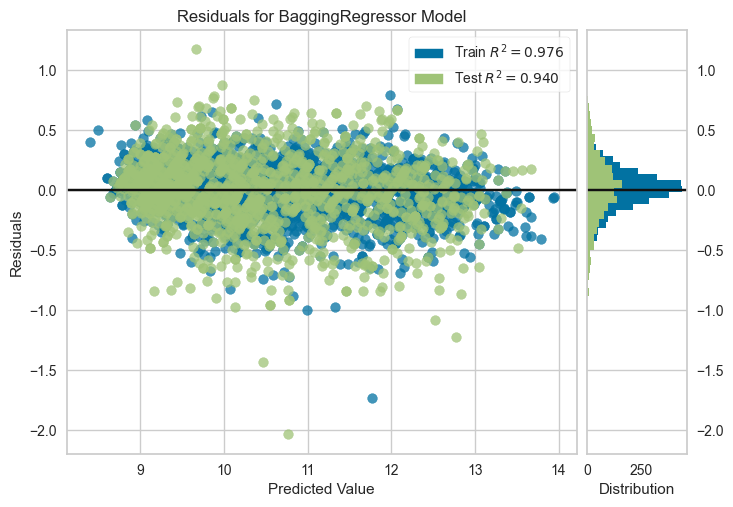

In [155]:
plot_model(bagged_tuned_lightgbm_model, plot='residuals')

After bagging, we see that the **train R2 decreased from 0.980 to 0.976** and **test R2 improved from 0.936 to 0.940**. The difference between the train and test R2 also **decreased from 0.044 to 0.036**, indicating that the **bagging effectively reduced the variance and improved generalization of the model**. This bagged model will be our finalized model.

In [182]:
# Set the bagged model as our finalized model
finalized_model = bagged_tuned_lightgbm_model

# 4. Analysis and Discussion of Performance of Final Method

The `plot_model` function can be used to analyze the performance of our trained model on the test set.

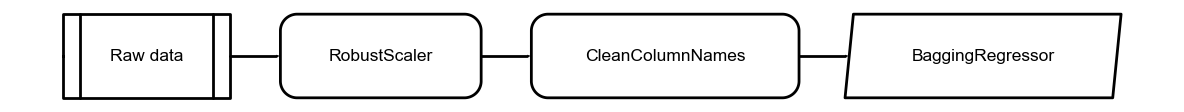

In [183]:
# Plot the pipeline of the finalized model
plot_model(finalized_model, plot='pipeline')

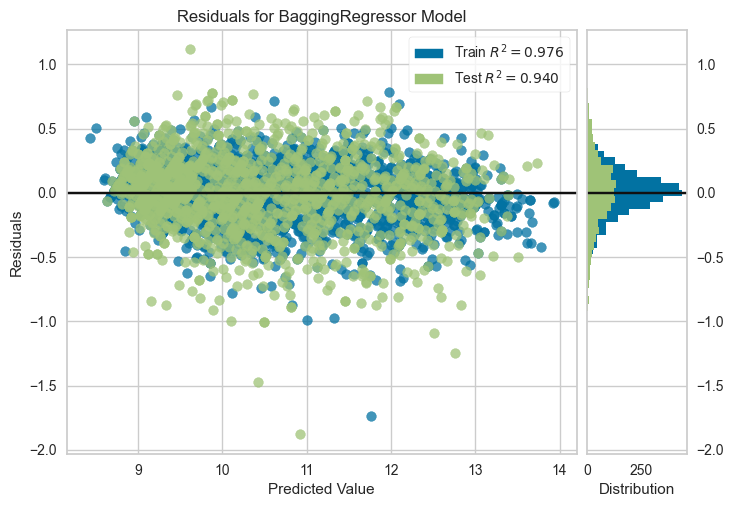

In [184]:
# Plot the residuals
plot_model(finalized_model, plot='residuals')

The residuals plot shows that there is little variance between the train and test set. The data are scattered and not clustered at 0 indicating that the model is not overfitted.

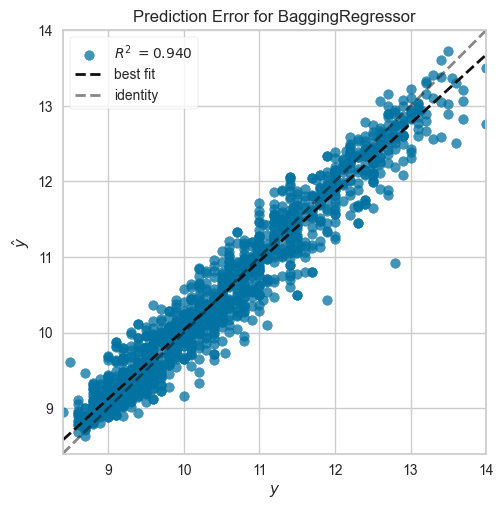

In [185]:
# Plot the error
plot_model(finalized_model, plot='error')

The R2 value is 0.940 indicating that the model is able to explain 94% of the variance in the target 'alcohol'.

The error plot shows that the best fit line is very close to the identity line. If we analyze these two lines, we observe that the best fit line is closest to the identity line when our target alcohol is ranged around 9.5 to 11.5. This means our model might perform best around this range. In contrast, our model tends to overpredict for y < 9.5 and underpredict for y > 11.5.

By judging the distance between the identity and best fit line, we also see that the gap between the two is furthest in the higher y range, indicating our model might perform the worst in this area. This could be because we have less training data for higher range of y.

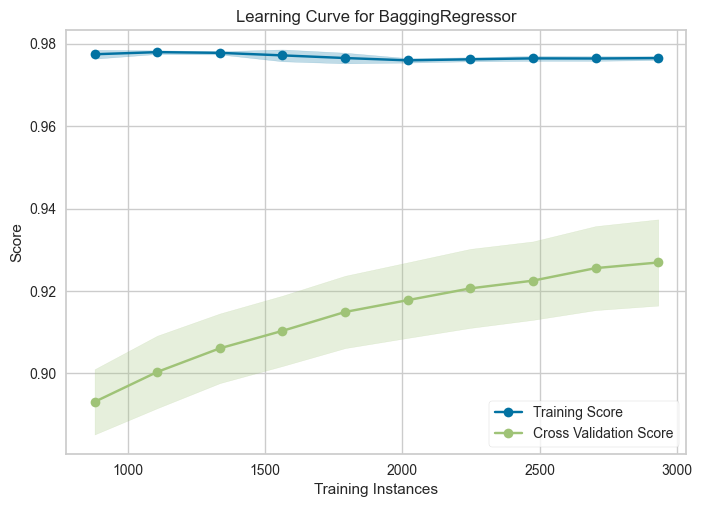

In [186]:
# Plot the learning curve
plot_model(finalized_model, plot='learning')

The learning curve shows the scores for both training and cross validation set as training instances increase. We see that for the training data, the model has a high score consistently above 0.96 and it plateaus very quickly showing that the model has no trouble learning from the training data.

For the cross validation, we see that as the training instances increase, the performance increases as well. The performance is still increasing as the training instance reaches 3000 and could possibly still increase since the convergence is not obviously seen here. **This means that the model could benefit and improve its performance if there is more data.**

One way to achieve this without manually collecting more data is to alter the test-train ratio. Currently, PyCaret automatically sets 70% of the data to training and 30% to testing. We could manually increase the training data ratio to >70% which could increase the cross-validation score.

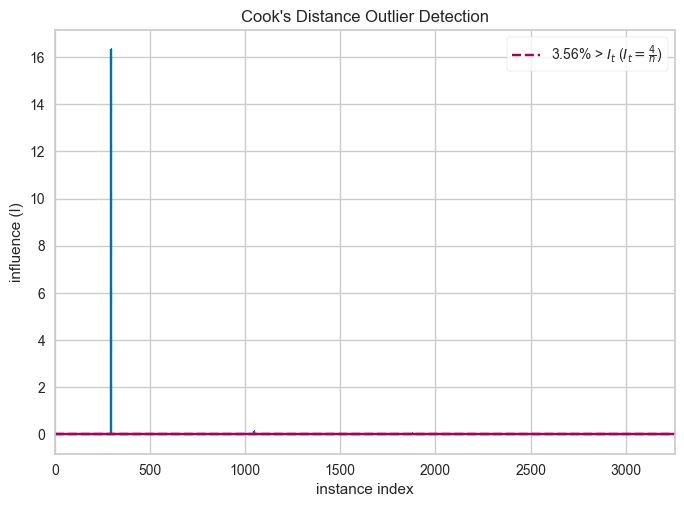

In [187]:
# Plot the Cook's distance
plot_model(finalized_model, plot='cooks')

Cook's Distance plot shows the influence that each instance has on the model. The purple line is the threshold in which a score above the threshold indicates that the instance is highly influential on the model.

Here we see that most of the instances are near the threshold except for one instance that has a significantly high influence. This indicates that removing this particular highly influential instance will cause significant changes to the values of the model. This outlier could be a mistake in data entry or a true rare occurance that happens naturally. In the case that it is wrongly entered, removing it would benefit our model. If it is a genuine representation of the data, then keeping it would probably make the model more realistic. 

Regardless, further investigation on this index is not included in this project and could be a part of future work.

Now that we analyzed and discussed the different metrics of the finalized model, we will use `predict_model()` to test the model on test set and unseen validation data that we set aside earlier in the project in Section 1.4. This unseen data was never exposed to the model before.

In [188]:
# Predict on test set
holdout_pred = predict_model(finalized_model)
holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2283,0.0930,0.3050,0.9397,0.0262,0.0216


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label
3442,6.3,0.330,0.20,17.9,0.066,36.0,161.0,0.99910,3.14,0.51,8.8,8.844852
2765,6.6,0.580,0.30,5.1,0.057,30.0,123.0,0.99490,3.24,0.38,9.0,9.214048
700,6.1,0.210,0.38,1.5,0.039,37.0,122.0,0.98972,3.20,0.43,12.0,12.107310
2077,6.6,0.545,0.04,2.5,0.031,48.0,111.0,0.99060,3.14,0.32,11.9,11.743955
4461,8.4,0.230,0.32,1.3,0.048,59.0,113.0,0.99178,3.10,0.55,11.0,11.050484


In [189]:
# Predict on unseen validation dataset
holdout_pred = predict_model(finalized_model, data=validation_data)
holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2127,0.0751,0.2740,0.9506,0.0237,0.0204


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
0,6.2,0.66,0.48,1.200000,0.029,29.0,75.0,0.9892,3.33,0.39,8,12.8,12.670714
1,7.3,0.24,0.39,17.950001,0.057,45.0,149.0,0.9999,3.21,0.36,5,8.6,8.932735
2,6.0,0.34,0.66,15.900000,0.046,26.0,164.0,0.9979,3.14,0.50,6,8.8,9.098314
3,7.2,0.27,0.46,18.750000,0.052,45.0,255.0,1.0000,3.04,0.52,5,8.9,9.113417
4,6.4,0.29,0.44,3.600000,0.200,75.0,181.0,0.9942,3.02,0.41,5,9.1,9.153208


We see that the finalized model works well on both the test set and the unseen validation dataset. If we focus on the three main important metrics (MAE, RMSE, R2), we see that the model's performance on the unseen data is even better than performance done on test set, with a performance of: R2 = 0.9506, MAE = 0.2127, and RMSE = 0.2740.

This shows that our model is very good at generalization, is not overfitted, and reliable.

Now we will save the finalized model.

In [190]:
# Save the finalized model as 'white_wine_regression_model'
save_model(finalized_model, 'white_wine_regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('normalize', TransformerWrapper(transformer=RobustScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  BaggingRegressor(estimator=LGBMRegressor(max_depth=7,
                                                           n_estimators=200,
                                                           n_jobs=-1,
                                                           random_state=123),
                                   n_estimators=25, random_state=123))]),
 'white_wine_regression_model.pkl')

In [191]:
# Load the model from the disk
loaded_model = load_model('white_wine_regression_model')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/lb/cd3x1hwx6v5ghnntmvthm2x40000gn/T/joblib),
         steps=[('normalize', TransformerWrapper(transformer=RobustScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 BaggingRegressor(estimator=LGBMRegressor(max_depth=7,
                                                          n_estimators=200,
                                                          n_jobs=-1,
                                                          random_state=123),
                                  n_estimators=25, random_state=123))])

# 4. Deployment of Final Model to HuggingFace

The finalized model is deployed onto HuggingFace which can be accessed through this link: https://huggingface.co/spaces/kanhchanaly/white_wine_regression_alcohol_prediction.

The space also includes:
- API Endpoint
- JSON request example
- Python example
- cURL Example

# 5. Conclusion and Future Improvements

In summary, this project used the UCI white wine dataset to develop a regression model for predicting the alcohol content of white wine. The workflow began with exploratory data analysis (EDA) to examine data distribution, identify outliers, and pairwise correlations. Next, feature engineering was performed, including scaling the data with a robust scaler. Several regression models were compared, with the Light Gradient Boosting Machine (LightGBM) having the best performance. A feature importance analysis was also conducted, which resulted in the dropping of the 'quality' feature. A tuning process was also conducted, followed by a bagging approach which improved both variance and R2. The finalized model is a bagged lightGBM model that has a performance of R2 = 0.9506, MAE = 0.2127, and RMSE = 0.2740 when used to predict on unseen dataset. Evaluation plots showing the residuals, errors, learning curve, and Cook's distance were also plotted.

Main summary:
- **EDA**: histograms, boxplots, and pairwise correlation.
- **Feature engineering**: robust scaling and feature dropping (quality)
- **Best base model**: Light Gradient Boosting Method (Lightgbm)
- **Ensemble method**: Bagging
- **Finalized model**: Bagged lightgbm
- **Final performance on unseen data**: R2 = 0.9506, MAE = 0.2127, and RMSE = 0.2740
- **Evaluation Plots**: residuals, errors, learning curve, Cook's distance

As future improvements, the below could be conducted:
- Increase the training data set to achieve cross-validation score convergence in the learning curve
- Investigate the highly influential point that was portrayed in Cook's distance plot and decide whether to drop or keep the data.
- This project used a limited amount of parameters for the hyperparameters tuning. Future work can widen the hyperameters search which could result in more optimal hyperparameters.